# Import libraries

In [2]:
!pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59220 sha256=8d2f2fefdff45c495f66a98e3add468cefad93f6dcd4d0d48c21676baf603600
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster

### import dataset in to notebook

In [4]:
Cosmetic_Df = pd.read_csv('cosmetics.csv')

### Performing Basic EDA

In [5]:
Cosmetic_Df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [6]:
Cosmetic_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [7]:
Cosmetic_Df.describe()


,Price,Rank,Combination,Dry,Normal,Oily,Sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [8]:
# prompt: code for each unique values in each column

for col in Cosmetic_Df.columns:
  print(f'{col}: {Cosmetic_Df[col].unique()}')


Label: ['Moisturizer' 'Cleanser' 'Treatment' 'Face Mask' 'Eye cream'
 'Sun protect']
Brand: ['LA MER' 'SK-II' 'DRUNK ELEPHANT' 'IT COSMETICS' 'TATCHA'
 "KIEHL'S SINCE 1851" 'FRESH' 'BELIF' 'SUNDAY RILEY' 'FARMACY'
 'FIRST AID BEAUTY' 'CLINIQUE' 'BAREMINERALS' 'SHISEIDO'
 'CHARLOTTE TILBURY' 'ORIGINS' 'OLEHENRIKSEN' 'JOSIE MARAN' 'FARSÁLI'
 'LANEIGE' 'DR. JART+' 'GLOW RECIPE' 'HERBIVORE' 'TARTE' 'CAUDALIE'
 'YOUTH TO THE PEOPLE' 'BIOSSANCE' 'ESTÉE LAUDER' 'SON & PARK'
 'AMOREPACIFIC' 'BOBBI BROWN' 'ERBORIAN' 'SMASHBOX' 'GLAMGLOW'
 'PETER THOMAS ROTH' 'JACK BLACK' 'PHILOSOPHY' 'PERRICONE MD' 'LANCÔME'
 'ALGENIST' 'MAKE UP FOR EVER' 'KORRES' 'MURAD' 'GUERLAIN' 'DIOR'
 'KORA ORGANICS' 'DR. DENNIS GROSS SKINCARE' 'REN CLEAN SKINCARE' 'KOPARI'
 'CLARINS' 'NURSE JAMIE' 'LANCER' "L'OCCITANE" 'KATE SOMERVILLE'
 'SUPERGOOP!' 'SATURDAY SKIN' 'SEPHORA COLLECTION' 'MILK MAKEUP'
 'DR. BRANDT SKINCARE' 'J.ONE' 'KAT VON D' 'TATA HARPER' 'GO-TO' 'BOSCIA'
 'EVE LOM' 'MAKEUP ERASER' 'LAURA MERCIER' 'NEOG

### Lable encoding for the to covert catgory variable into numarical

In [11]:
# prompt: perform label encoding for the Cosmetic_Df

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

Cosmetic_le_Df = Cosmetic_Df.copy()

# Apply label encoding to each categorical column
for col in Cosmetic_le_Df.select_dtypes(include=['object']).columns:
  Cosmetic_le_Df[col] = le.fit_transform(Cosmetic_le_Df[col])

Cosmetic_le_Df.head()


,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,3,64,335,175,4.1,112,1,1,1,1,1
1,3,95,525,179,4.1,248,1,1,1,1,1
2,3,29,985,68,4.4,764,1,1,1,1,0
3,3,64,1265,175,3.8,111,1,1,1,1,1
4,3,49,1459,38,4.1,1252,1,1,1,1,1


### In the above data we are going to consider "Lable" as output variable

In [12]:
# Split-out validation dataset
array = Cosmetic_le_Df.values
# separate array into input and output components
X = array[:,1:]
Y = array[:,0]

### Apply t-SNE algorithm to the dataset

In [13]:
#TSNE visualization
from bioinfokit.visuz import cluster


model = TSNE(2)
model.fit(X)
#data_tsne = model.transform(X)

data_tsne = TSNE(n_components=2).fit_transform(X)
cluster.tsneplot(score=data_tsne)

In [14]:
# get a list of categories
color_class = Cosmetic_le_Df['Label'].to_numpy()
cluster.tsneplot(score=data_tsne, colorlist=color_class, legendpos='upper right')
#Plot will be stored in the default directory

### Visualize the dataframe into 2D format

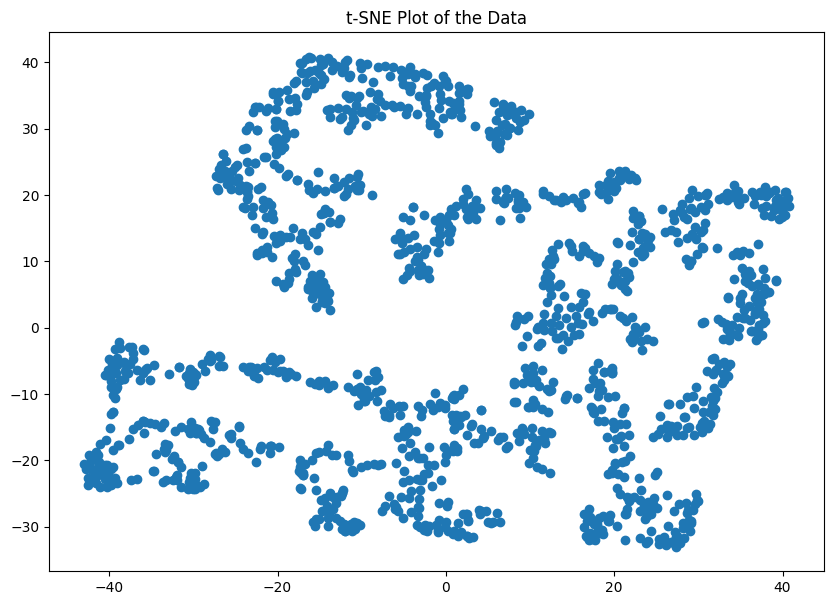

In [15]:
plt.figure(figsize=(10, 7))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1],hue)
plt.title('t-SNE Plot of the Data')
plt.show()

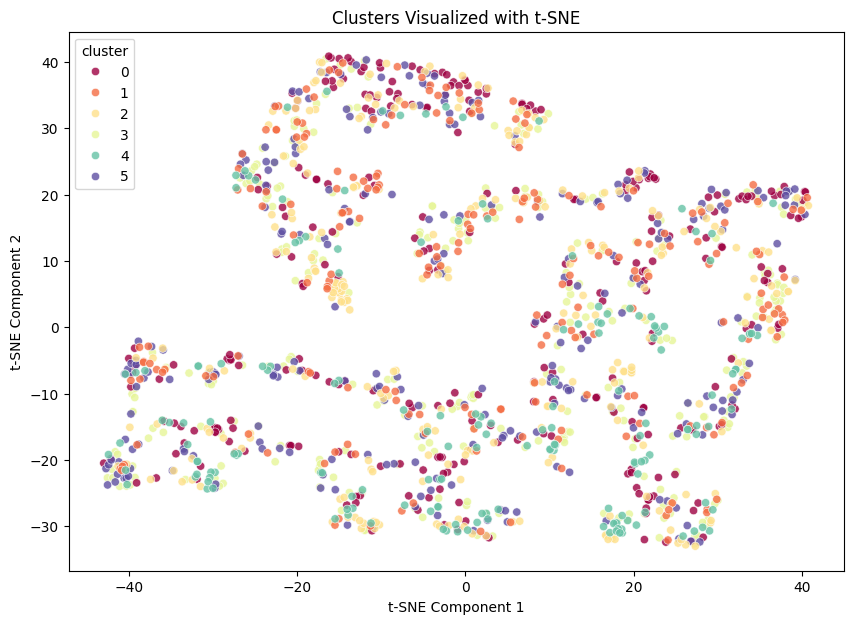

In [20]:
# Add the cluster information to the reduced data
# Plotting
plt.figure(figsize=(10, 7))

# Create a DataFrame with t-SNE components and labels
tsne_df = pd.DataFrame(data_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])
tsne_df['cluster'] =  Cosmetic_le_Df['Label'] # Assuming 'Label' column contains cluster information

# Use the new DataFrame for plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=tsne_df, palette='Spectral', alpha=0.8 )
plt.title('Clusters Visualized with t-SNE')
plt.show()